# Design mesh for simulation

In [1]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable

from IPython.display import display

In [2]:
data = './data/'
out = './out/'

# Bold print for Jupyter Notebook
b1 = '\033[1m'
b0 = '\033[0m'

### Just some matplotlib and seaborn parameter tuning

In [3]:
axistitlesize = 20
axisticksize = 17
axislabelsize = 26
axislegendsize = 23
axistextsize = 20
axiscbarfontsize = 15

# Set axtick dimensions
major_size = 6
major_width = 1.2
minor_size = 3
minor_width = 1
mpl.rcParams['xtick.major.size'] = major_size
mpl.rcParams['xtick.major.width'] = major_width
mpl.rcParams['xtick.minor.size'] = minor_size
mpl.rcParams['xtick.minor.width'] = minor_width
mpl.rcParams['ytick.major.size'] = major_size
mpl.rcParams['ytick.major.width'] = major_width
mpl.rcParams['ytick.minor.size'] = minor_size
mpl.rcParams['ytick.minor.width'] = minor_width

mpl.rcParams.update({'figure.autolayout': False})

# Seaborn style settings
sns.set_style({'axes.axisbelow': True,
               'axes.edgecolor': '.8',
               'axes.facecolor': 'white',
               'axes.grid': True,
               'axes.labelcolor': '.15',
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': True,
               'axes.spines.top': True,
               'figure.facecolor': 'white',
               'font.family': ['sans-serif'],
               'font.sans-serif': ['Arial',
                'DejaVu Sans',
                'Liberation Sans',
                'Bitstream Vera Sans',
                'sans-serif'],
               'grid.color': '.8',
               'grid.linestyle': '--',
               'image.cmap': 'rocket',
               'lines.solid_capstyle': 'round',
               'patch.edgecolor': 'w',
               'patch.force_edgecolor': True,
               'text.color': '.15',
               'xtick.bottom': True,
               'xtick.color': '.15',
               'xtick.direction': 'in',
               'xtick.top': True,
               'ytick.color': '.15',
               'ytick.direction': 'in',
               'ytick.left': True,
               'ytick.right': True})

# Colorpalettes, colormaps, etc.
sns.set_palette(palette='rocket')

## Defines vertices

In [6]:
vertices = np.array([
    # Bottom plane
    (0,0,0),  # 0
    (4,0,0),  # 1
    (4,0,4),  # 2
    (0,0,4),  # 3
    # Middle plane
    (0,4,0),  # 4 over 0
    (4,4,0),  # 5 over 1
    (4,4,4),  # 6 over 2
    (0,4,4),  # 7 over 3
    # Upper plane
    (0,16,0), # 8 over 4
    (4,16,0), # 9 over 5
    (4,16,4), # 10 over 6
    (0,16,4), # 11 over 7
])

In [7]:
sideWalls = np.array([
    (0,1,5,4),
    (1,2,6,5),
    (2,3,7,6),
    (3,0,4,7),
])
lowerWall = np.array([
    (0,1,2,3),
])
atmosphere = np.array([
    (4,5,9,8),
    (7,6,10,11),
])

In [8]:
x = vertices[:,0]
y = vertices[:,1]
z = vertices[:,2]

In [27]:
blocks = np.array([
    (60,60,60),
    (60,60,60),
])
N_points = np.sum(np.prod(blocks, axis=1))
print('N_points = {0}'.format(N_points))

N_points = 432000


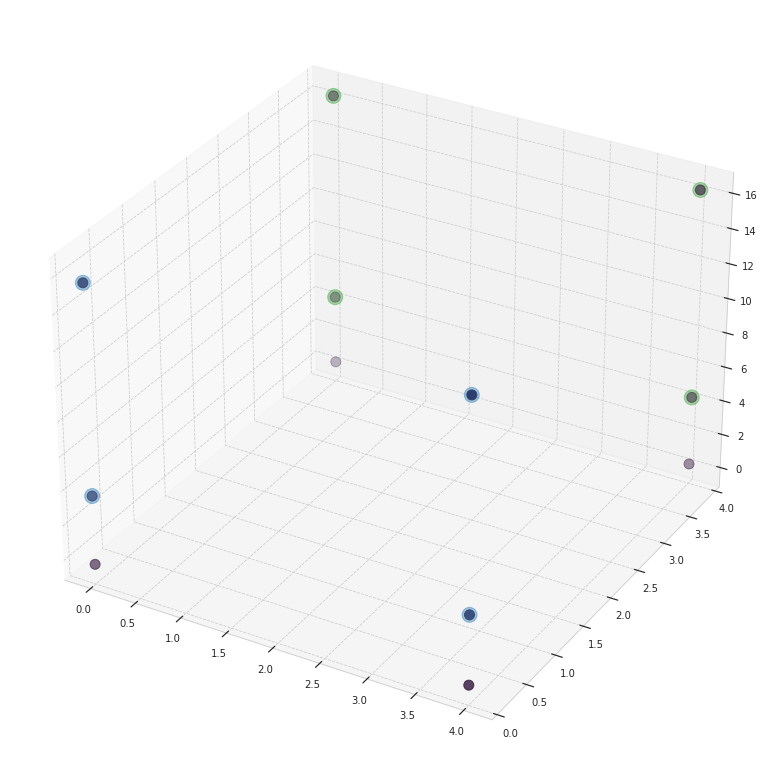

In [10]:
fig, axes = plt.subplots(figsize=(14,14),
                         subplot_kw={'projection' : '3d'})

r = 10
axes.scatter(x, z, y, s=r**2)

atm_colors = ['tab:blue', 'tab:green']
for i in range(len(atmosphere)):
    x_atm = vertices[atmosphere[i]][:,0]
    y_atm = vertices[atmosphere[i]][:,1]
    z_atm = vertices[atmosphere[i]][:,2]
    axes.scatter(x_atm, z_atm, y_atm,
                 c=atm_colors[i], s=(r+5)**2, alpha=0.4)
axes.set_ylim(0,4)

plt.show()